<a href="https://colab.research.google.com/github/Umaporn19/multivariate/blob/main/Multivariate_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ให้นักศึกษาทำข้อสอบใน Colab Notebook นี้โดยกรอกข้อมูลของตัวเองใน cell ที่ 2 แล้วรัน cell ที่ 1 - 5 และเริ่มทำข้อสอบใน cell ที่ 6 เป็นต้นไป

โดยโจทย์คือ
1. ข้อมูลโจทย์ อยู่ใน ตัวแปร ```Data```
2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ
3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ
4. เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.
5. เขียน comments อธิบายทุกขั้นตอน
6. อัด video อธิบาย code ทุกๆขั้นตอนรวมถึงผลแล้วอัพลง youtube ในรูปแบบ unlist 
7. commit โดยใช้ชื่อ commit เป็น link youtube ที่อธิบาย code ในข้อ 6.

กำหนดส่งวันที่ 2 พฤษภาคม 2564 (โดยให้มากรอกวันที่ commit ครั้งสุดท้ายใน sheet: https://docs.google.com/spreadsheets/d/1_qJwLDJVtOW1HxBcf_FHVc6UT4J_SOonuR6o3EEnVzw/edit?usp=sharing ช่อง Final)

In [ ]:
from sklearn.datasets import make_blobs
import random,math
import numpy as np
import pandas

In [ ]:
Name = 'อุมาพร คำภิชัย'
ID = '6230205470'

In [ ]:
def DataGenerator(name,id):
    random.seed(int(id[3:6]))
    numfeat = random.randint(20,30)
    ct = random.randint(len(name)-6,len(name))
    
    X, y = make_blobs(n_samples=10000, centers=ct, n_features=numfeat , random_state=int(id[3:6]))

    print(f'{id[3:6]}:{numfeat}:{ct}')
    X_t = (X[:,1]*2)+int(id[3])
    X_t2 = (X[:,-1]*5)+int(id[4])

    DT = np.append(X,X_t.reshape([10000,1]),axis=1)
    DT = np.append(DT,X_t2.reshape([10000,1]),axis=1)
    
    return pandas.DataFrame(DT)

In [ ]:
Data = DataGenerator(Name,ID)

020:30:14


In [ ]:
Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,5.779841,9.590162,7.580040,-4.278572,-6.772580,-3.337118,9.763874,2.163429,8.836751,-9.402668,6.069058,-9.942346,-9.473521,-8.133425,-3.969872,-0.409420,7.109384,7.607849,1.669154,7.170246,-8.165292,4.877405,-7.617871,-6.756496,8.850628,-5.386895,7.550170,1.864166,4.126644,2.942146,19.180325,16.710729
1,-1.969309,-5.779929,-0.479035,7.120809,-6.967939,-2.562261,-1.431636,-2.876955,-8.809777,-7.156166,9.225777,-5.276836,-10.170002,-0.050986,2.987005,-1.758751,9.133687,-4.224050,6.810339,0.860089,4.585015,2.999504,-7.098761,-8.103267,8.184693,9.626054,3.503491,-0.090879,-0.446152,7.465699,-11.559858,39.328496
2,3.599102,3.524340,-6.054480,-9.089953,5.181669,-0.834194,-3.931799,-0.137943,-4.589369,-2.365034,3.685007,0.919187,-3.120397,-2.182186,-4.271154,2.253673,-6.701235,3.455984,7.511894,-4.712591,5.952467,-0.483959,3.421101,5.602329,7.429803,0.191208,2.966675,2.952572,-2.706058,2.749403,7.048680,15.747013
3,2.610732,2.268904,-4.365511,-8.991586,6.929414,0.396067,-3.116764,0.122945,-4.237205,-4.860459,1.596553,1.567507,-2.599508,-1.812618,-5.665761,4.284519,-6.163315,2.150961,6.780581,-7.338840,4.205672,-1.683074,4.436318,7.012761,4.945608,2.722019,1.213484,2.704299,-0.405857,0.589666,4.537807,4.948332
4,1.229763,6.218683,6.069170,7.837148,-7.564717,9.068409,8.398188,-6.073507,5.877496,-2.328447,-1.386795,2.800630,8.479073,6.045114,9.387522,3.651719,-8.845904,8.773557,-4.049647,4.501112,7.998507,-0.474366,6.817369,8.979003,11.270047,-5.587750,-4.801151,-4.927810,-0.572961,7.252844,12.437365,38.264218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,4.115431,7.000837,-9.653089,-7.160725,9.323379,0.008322,8.853850,2.496611,3.815244,0.382697,6.690362,-3.427856,-4.262191,-1.233465,-2.097576,6.860297,-3.083898,-1.410190,-0.426802,-2.115237,2.321582,-6.152592,4.205598,-4.351731,9.674877,-8.252335,6.537963,-1.520673,-7.923699,3.938198,14.001675,21.690991
9996,8.642016,-10.310443,-4.164195,-0.103425,5.280763,10.100324,10.376776,2.035528,-2.865085,-3.634668,3.175611,3.091032,4.854759,-3.718518,9.154610,7.477065,-5.644479,3.183633,7.624630,-10.160440,-6.843769,9.264963,6.128426,4.705592,9.834965,-6.510483,-8.046730,5.285699,-0.492100,4.496800,-20.620886,24.484000
9997,2.576362,-2.282850,-1.977706,7.939707,1.760702,-6.222240,3.906714,-4.212861,7.771867,-2.179046,-7.370692,1.098961,-5.226815,-7.994809,-3.480564,1.547576,1.043375,7.676349,2.609321,-8.077446,6.056793,-7.367577,-8.567476,-3.069323,4.276709,-6.563668,-2.562896,10.299857,8.607741,1.419396,-4.565701,9.096982
9998,5.623216,6.132319,-9.526871,-7.102227,7.470630,1.645184,7.913972,-0.513498,6.165712,-2.734110,7.303640,-0.367817,-4.374165,-1.374892,-1.328014,6.636919,-2.271619,-4.250679,-0.379184,-3.499792,3.763622,-6.828777,4.275611,-3.615921,9.257696,-6.524113,6.213284,-3.265337,-6.691210,4.450119,12.264638,24.250595


In [ ]:
Data.shape #ดูว่าข้อมูลมีกี่แถวกี่คอลัมม์ ดูขนาดของข้อมูลที่นำเข้ามา

(10000, 32)

# ข้อ 2 ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ

### Import

In [ ]:
from sklearn.cluster import KMeans #นำข้อมูลเข้ามาในขั้นตอนนี้ ใส่ฟังก์ชันที่เราอยากได้

### Difine

In [ ]:
kmeans = KMeans(random_state=2021) #เป็นคำสั่งกำหนดค่า K แต่ในที่นี้คือค่า K ที่เป็น Default เรายังไม่กำหนด

### Fit- transform 

In [ ]:
kmeans.fit(Data) #คำนวณจุด cluster centers ของข้อมูล Data ด้วยวิธี K-means clustering

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2021, tol=0.0001, verbose=0)

In [ ]:
kmeans.cluster_centers_  #แสดงจุด cluster centers ที่คำนวณออกมาได้

array([[ 2.68465309e+00,  5.51281836e+00,  1.59377799e+00,
        -1.14098972e+00, -1.96321082e+00,  1.74906213e+00,
        -2.92547218e+00,  3.21082773e-01, -7.86961544e-01,
        -4.97237840e+00, -1.00286744e+00,  2.73316601e+00,
         9.96214564e-01,  2.42519924e+00,  3.65427957e-01,
        -3.81964919e+00, -7.21604655e+00,  3.49292498e+00,
         6.24430114e-01, -5.86822571e+00,  5.92854052e+00,
         3.57690327e+00,  3.41999915e+00, -1.50558073e-01,
         5.58089454e+00,  8.29768864e-01,  2.99271943e+00,
         4.86660992e+00, -1.14473884e+00,  9.69344807e-02,
         1.10256367e+01,  2.48467240e+00],
       [ 4.81312383e+00, -7.13526097e+00, -3.80883929e+00,
         1.34899279e+00,  4.99552690e+00,  9.41670956e+00,
         5.96973041e+00,  8.03495698e-01, -4.28205996e+00,
        -5.63031415e-01,  1.02225355e+00, -1.86353837e-01,
         3.53121455e+00,  2.77303843e+00,  6.18565004e+00,
         3.71192715e+00, -9.26798331e-01,  5.98123956e+00,
         7.09

### ทดสอบการจัดกลุ่มของ Data 

In [ ]:
y = kmeans.predict(Data) #สามารถบอกได้ว่าจุดไหนอยู่กลุ่มไหน
y

array([7, 6, 0, ..., 2, 7, 7], dtype=int32)

### PCA

      # ทำ PCA เพื่อลด Dimention ของข้อมูล แล้วสามารถดูได้ว่า ที่ลด Dimention ไปนั้นสามารถที่จะจัดกลุ่มได้กี่กลุ่มที่เราหามาจาก Kmeans

In [ ]:
from sklearn.decomposition import PCA #Import

pca = PCA(n_components=2) #Define

new_pca = pca.fit_transform(Data) #Fit- transform

In [ ]:
from matplotlib import pyplot as plt

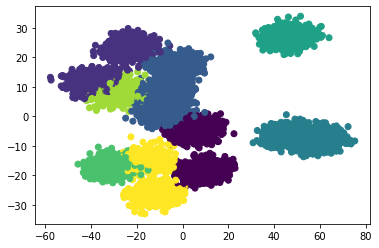

In [ ]:
kmeans = KMeans(random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y)

In [ ]:
# จากกราฟที่ได้มาจะเห็นว่ามีแบ่งกลุ่มข้อมูล พบว่า มีทั้งหมด 8 กลุ่ม เนื่องจากกลุ่มของข้อมูลได้ประกอบไปด้วยสีที่แตกต่างกัน 8 สี จึงทำให้ทราบได้ว่า ข้อมูลมี 8 กลุ่ม 

## ค่า K ที่เหมาะสมควรจะเป็นเท่าไหร่

###  หาค่า K ด้วยวิธี Elbow Method

#### หา SSE

In [47]:
kmeans.inertia_ # SSE (Sum of squared Errors)

4633939.742169999

In [ ]:
SSE = list()
for k in [1,2,3,4,5,6,7,8]: #วนลูปเปลี่ยน k = 1 เป็น 2 , 2 เป็น 3 ไปเรื่อย ๆ จนถึง 8
    kmeans = KMeans(n_clusters = k , random_state = 2021) #ให้เปลี่ยนค่าทุกครั้ง และ random_state เพื่อที่จะให้ทุกคนได้ค่าสุ่มเหมือนกัน
    XX = kmeans.fit(Data)
    SSE.append(kmeans.inertia_)

In [ ]:
SSE # จะได้ค่า SSE ออกมา

[19492074.617149524,
 12287226.791411135,
 10192922.646103252,
 8882237.446246957,
 7776083.319813388,
 6741366.527387712,
 5648010.760576062,
 4633939.742169999]

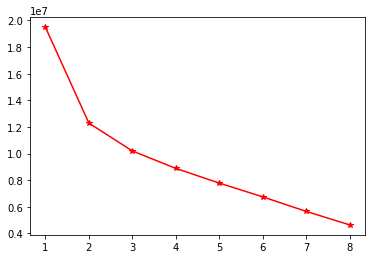

In [55]:
plt.plot([1,2,3,4,5,6,7,8],SSE,'*-r') #จากกราฟจะเห็นได้ว่า การหาค่า K ด้วยวิธี Elbow Method ค่า K = 2 เพราะในวิธี Elbow Method นี้เราจะดูข้อมูลตรงที่มีการหัก เปรียบเสมือนข้อศอก

### หาค่า K ด้วยวิธี The silhouette coefficient

    สามารถดูได้ว่า 1. ในข้อมูลกลุ่มเดียวกันมีจุดไหนที่ใกล้กันบ้าง 
                        2. ในข้อมูลต่างกลุ่มกันมีจุดไหนไกลกันบ้าง

In [ ]:
from sklearn import metrics

In [ ]:
SilH = list()
for k in [2,3,4,5,6,7,8]: #SilH จะไม่สามารถคิดข้อมูลที่มีกลุ่มเดียวได้ จึงเพราะที่ k = 2
    kmeans = KMeans(n_clusters=k, random_state=2021)
    kmeans.fit(Data)
    score = metrics.silhouette_score(Data,kmeans.labels_)
    SilH.append(score)

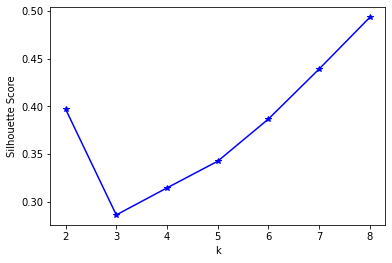

In [54]:
plt.plot([2,3,4,5,6,7,8],SilH,'*-b')
plt.xlabel('k')
plt.ylabel('Silhouette Score');

# จากกราฟที่ได้จะเห็นว่าจุดที่มีความสูงของ Silhouette Score บอกได้ว่า มีความใกล้กันมากของข้อมูลที่เป็นกลุ่มเดียวกัน และ ความห่างกันในข้อมูลต่างกลุ่มกันมาก
# จำนวนกลุ่มที่ดีที่สุดคือ k = 8 มีค่า Silhouette Score ประมาณ 0.49

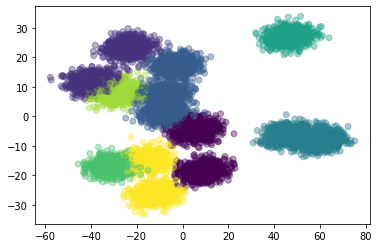

In [56]:
kmeans = KMeans(n_clusters=8, random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y,alpha=0.4)

# เมื่อกำหนดให้ค่า K = 8 ที่ได้จากการดูกราฟด้านบน ทำให้เห็นผลลัพธ์ของค่าข้อมูลที่ทับซ้อนกันจะมีสีเข้ม

# ข้อ 3 ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ

In [ ]:
corr = np.corrcoef(Data.to_numpy().T)

In [ ]:
corr.shape #ดูขนาดของ  Data

(32, 32)

In [ ]:
corr

array([[ 1.        , -0.03522889,  0.06557524, ...,  0.41074998,
        -0.03522889,  0.41074998],
       [-0.03522889,  1.        ,  0.26280354, ..., -0.10765056,
         1.        , -0.10765056],
       [ 0.06557524,  0.26280354,  1.        , ..., -0.01992461,
         0.26280354, -0.01992461],
       ...,
       [ 0.41074998, -0.10765056, -0.01992461, ...,  1.        ,
        -0.10765056,  1.        ],
       [-0.03522889,  1.        ,  0.26280354, ..., -0.10765056,
         1.        , -0.10765056],
       [ 0.41074998, -0.10765056, -0.01992461, ...,  1.        ,
        -0.10765056,  1.        ]])

In [58]:
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if (i !=j) and (corr[i,j] == 1.):
            print(f'row = {i} column = {j} corrcoef = {corr[i,j]}') 

            # สรุป จากการรันจะพบว่า ไม่มีข้อมูลใดที่มีความสัมพันธ์กัน หรือ มี Correlation = 1 เนื่องจากรันแล้วไม่มีการเกิดผลลัพธ์ใด ๆ ออกมา จึงทำให้ทราบว่าข้อมูลไม่มีความสัมพันธ์กัน

### ลด Dimension ของข้อมูล

### ทำ MDS

In [ ]:
from sklearn.manifold import MDS

In [ ]:
mds = MDS(n_components=2) #กำหนด components เท่ากับ 2

In [ ]:
new_mds = mds.fit_transform(Data)

#### ทำ kmeans

In [ ]:
kmeans1 = KMeans(n_clusters=8,random_state=2021)
kmeans1.fit(Data)
a = kmeans1.predict(Data)

Text(0.5, 1.0, 'DataGenerator')

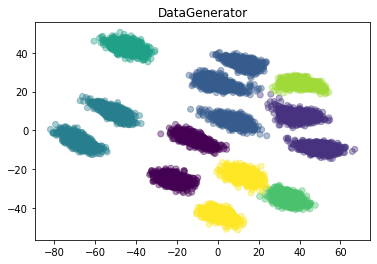

In [ ]:
plt.scatter(new_mds[:,0],new_mds[:,1],c=a,alpha=0.4)
plt.title('DataGenerator') 

# ข้อ 4 เปรียบเทียบความแตกต่างของผลลัพธ์ข้อ 2 กับ ข้อ 3

#### ผลลัพธ์ของข้อที่ 2

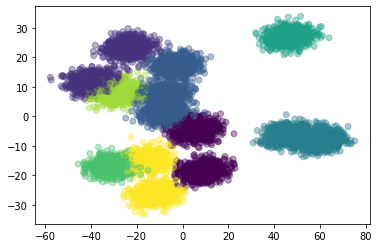

In [ ]:
kmeans = KMeans(n_clusters=8, random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y,alpha=0.4)

#### ผลลัพธ์ของข้อที่ 3

Text(0.5, 1.0, 'DataGenerator')

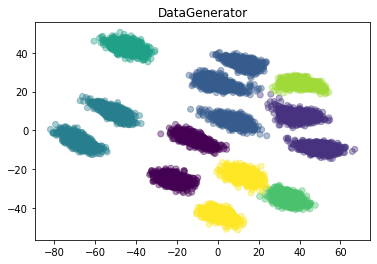

In [57]:
plt.scatter(new_mds[:,0],new_mds[:,1],c=a,alpha=0.4)
plt.title('DataGenerator')

#### สรุป จากที่เห็นกราฟทั้ง 2 กราฟ จะเห็นว่า การกระจายของข้อมูลนั้นมีความแตกต่างกันอย่างชัดเจน 

เนื่องจากกราฟผลลัพธ์ของข้อที่ 2 นั้น ได้ทำการลด Dimention ด้วยวิธี PCA จะเห็นว่าข้อมูลจากกราฟ ทราบว่าจุดไหนใกล้จุดไหนบ้าง 

และกราฟผลลัพธ์ของข้อที่ 3 นั้น ทำการลด Dimention ด้วยวิธี MDS จะดูระยะห่างของจุดของข้อมูล
